In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [2]:
import pandas as pd
data = pd.read_csv('hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [3]:
data.label.value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [ ]:
import os
from PIL import Image

# Path to second dataset
data_dir = "E:\\Programming\\cv-skin-cancer\\archive\\Oily-Dry-Skin-Types\\all"

# List to store flattened image data
rows = []

for label in os.listdir(data_dir):
    folder = os.path.join(data_dir, label)
    if not os.path.isdir(folder):
        continue

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)

        # Open and resize 
        img = Image.open(img_path).convert('RGB').resize((28, 28))

        # Flatten (28x28x3 = 2352 values)
        img_array = np.array(img).flatten()

        # Add label at the end
        img_array = np.append(img_array, 7)  #all normal skin is labeled as 7

        rows.append(img_array)

# Convert to DataFrame
num_pixels = 28 * 28 * 3
columns = [f'pixel{str(i).zfill(4)}' for i in range(num_pixels)] + ['label']
df = pd.DataFrame(rows, columns=columns)

# Save as CSV
#df.to_csv('images_28x28_rgb.csv', index=False)
print("CSV created: images_28x28_rgb.csv")


CSV created: images_28x28_rgb.csv


In [5]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,7
1,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,1,1,1,1,1,1,2,2,2,2,...,2,2,2,1,1,1,2,2,2,7
4,7,7,7,7,7,7,6,6,6,5,...,33,33,33,33,33,33,6,6,6,7


In [6]:
data.shape

(10015, 2353)

In [7]:
df.shape

(3152, 2353)

In [8]:
data['label'].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [9]:
data = pd.concat([data, df], ignore_index=True)

In [10]:
data['label'].value_counts()

label
4    6705
7    3152
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [11]:
data.shape

(13167, 2353)

In [12]:
y = data['label']
x = data.drop(columns = ['label'])

In [13]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

c:\Users\ACER\anaconda3\envs\tf-2190\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\ACER\anaconda3\envs\tf-2190\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [14]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (53640, 28, 28, 3)


In [15]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [20]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [21]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 32,
                    epochs = 30)

Epoch 1/30
1073/1073 [==============================] - 9s 8ms/step - loss: 0.9661 - accuracy: 0.6315 - val_loss: 0.5168 - val_accuracy: 0.8079
Epoch 2/30
1073/1073 [==============================] - 9s 8ms/step - loss: 0.3938 - accuracy: 0.8560 - val_loss: 0.3062 - val_accuracy: 0.8844
Epoch 3/30
1073/1073 [==============================] - 8s 8ms/step - loss: 0.2480 - accuracy: 0.9090 - val_loss: 0.2420 - val_accuracy: 0.9139
Epoch 4/30
1073/1073 [==============================] - 8s 7ms/step - loss: 0.1781 - accuracy: 0.9342 - val_loss: 0.1674 - val_accuracy: 0.9336
Epoch 5/30
1073/1073 [==============================] - 8s 8ms/step - loss: 0.1433 - accuracy: 0.9461 - val_loss: 0.1648 - val_accuracy: 0.9444
Epoch 6/30
1073/1073 [==============================] - 8s 7ms/step - loss: 0.1143 - accuracy: 0.9590 - val_loss: 0.1590 - val_accuracy: 0.9489
Epoch 7/30
1073/1073 [==============================] - 7s 7ms/step - loss: 0.0892 - accuracy: 0.9677 - val_loss: 0.1429 - val_accuracy:

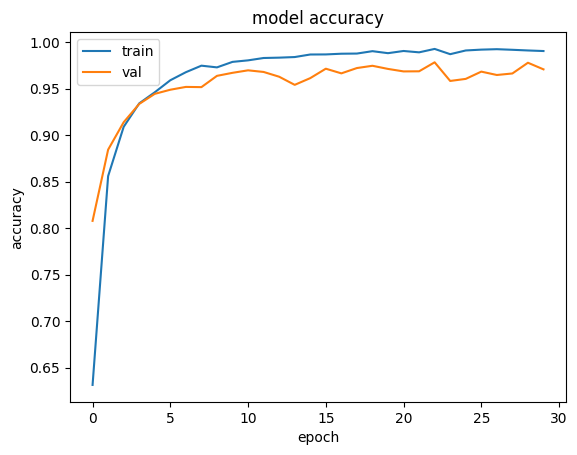

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

336/336 - 1s - loss: 0.1635 - accuracy: 0.9726 - 1s/epoch - 4ms/step
